Modelo KNN

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# mise en place

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no':0})
dados['charges'] = dados['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


##Upgrade na Técnica de Validação: Holdout Repetido

Repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento; Guardando os resultados do EQM para cada repetição e, no final, calculando a média para obter um valor mais estável para o EQM.

In [ ]:
from sklearn.linear_model import LinearRegression #modelo
from sklearn.metrics import mean_squared_error #metrica
from sklearn.model_selection import train_test_split #validação

import numpy as np #algebra linear

R = 100 # 100 repetições de holdout
eqms = [] # criação de uma lista para guardar os valores de KNN, diante dessas repetições

X = dados[['bmi', 'smoker']] # definição de X - variável de predição
y = dados['charges'] # definição de y - variável de resposta

for i in range(R): #repetir varias vezes, e guardar no final da lista o valor de KNN
  Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
  reg = LinearRegression()
  reg.fit(Xtreino, ytreino)
  preditos = reg.predict(Xteste)
  eqm = mean_squared_error(yteste, preditos)
  eqms.append(eqm)

  print(np.mean(eqms))

52.29868212306417
53.38543378643941
52.92947951319481
53.336443918129945
52.83843403398729
51.789361675912836
50.160233971802676
51.83951859964385
50.63164998843333
50.83001431787056
51.13819090176687
51.59127359075895
51.22761550591842
50.837638694858924
50.761207731036535
51.02708887169376
50.99496691043191
50.748250012783075
50.798314254763376
50.62433443326339
50.63145144672607
50.682965262197996
50.82422147559557
50.40290052306246
50.12439927457066
50.409152427633884
50.47801106990429
50.359655420180324
50.31039937944204
50.261709534608485
50.329435097541676
50.37653459139603
50.42136641967862
50.27431347714983
50.20619016540492
50.361105210719536
50.30656794340328
50.182368550259675
50.18468830224934
50.353008213870424
50.384748824256924
50.34350062159276
50.20411527380331
50.198141817562515
50.14248127852276
50.24656240394256
50.17248738796581
50.28159276784786
50.35295458880873
50.291112269758706
50.328181358893076
50.309979885595695
50.22873252951208
50.092894704649275
50.1959

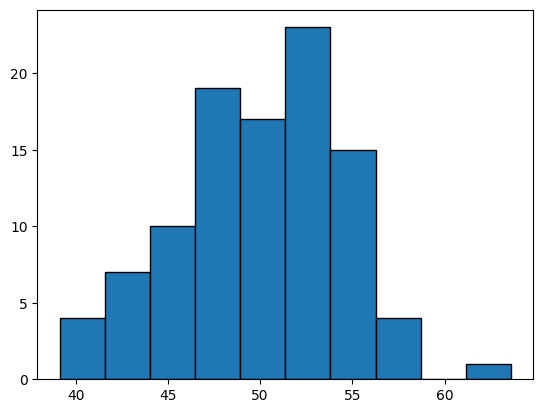

In [ ]:
import matplotlib.pyplot as plt

plt.hist(eqms, edgecolor = 'black')
plt.show()

## Modelo: K-Vizinhos Mais Próximos (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k = 37

R = 100

eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges']

for i in range(R):
  Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

  knn = KNeighborsRegressor(n_neighbors = k)
  knn.fit(Xtreino, ytreino)

  preditos_treino = knn.predict(Xtreino)
  eqm_treino = mean_squared_error(preditos_treino, ytreino)
  eqms_treino.append(eqm_treino)

  preditos_teste = knn.predict(Xteste)
  eqm_teste = mean_squared_error(preditos_teste, yteste)
  eqms_teste.append(eqm_teste)

  print('O EQM de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
  print('O EQM de TESTE foi: {:.2f}'.format(np.mean(eqms_teste)))

O EQM de TREINO foi: 137.16
O EQM de TESTE foi: 138.63
O EQM de TREINO foi: 139.15
O EQM de TESTE foi: 134.24
O EQM de TREINO foi: 138.18
O EQM de TESTE foi: 137.70
O EQM de TREINO foi: 138.57
O EQM de TESTE foi: 135.87
O EQM de TREINO foi: 137.22
O EQM de TESTE foi: 140.07
O EQM de TREINO foi: 136.49
O EQM de TESTE foi: 142.72
O EQM de TREINO foi: 136.02
O EQM de TESTE foi: 144.12
O EQM de TREINO foi: 135.95
O EQM de TESTE foi: 144.31
O EQM de TREINO foi: 135.68
O EQM de TESTE foi: 144.89
O EQM de TREINO foi: 135.73
O EQM de TESTE foi: 144.71
O EQM de TREINO foi: 135.28
O EQM de TESTE foi: 145.95
O EQM de TREINO foi: 135.38
O EQM de TESTE foi: 145.67
O EQM de TREINO foi: 135.48
O EQM de TESTE foi: 145.63
O EQM de TREINO foi: 135.62
O EQM de TESTE foi: 145.03
O EQM de TREINO foi: 135.34
O EQM de TESTE foi: 146.00
O EQM de TREINO foi: 135.55
O EQM de TESTE foi: 145.28
O EQM de TREINO foi: 135.87
O EQM de TESTE foi: 144.28
O EQM de TREINO foi: 135.83
O EQM de TESTE foi: 144.33
O EQM de T

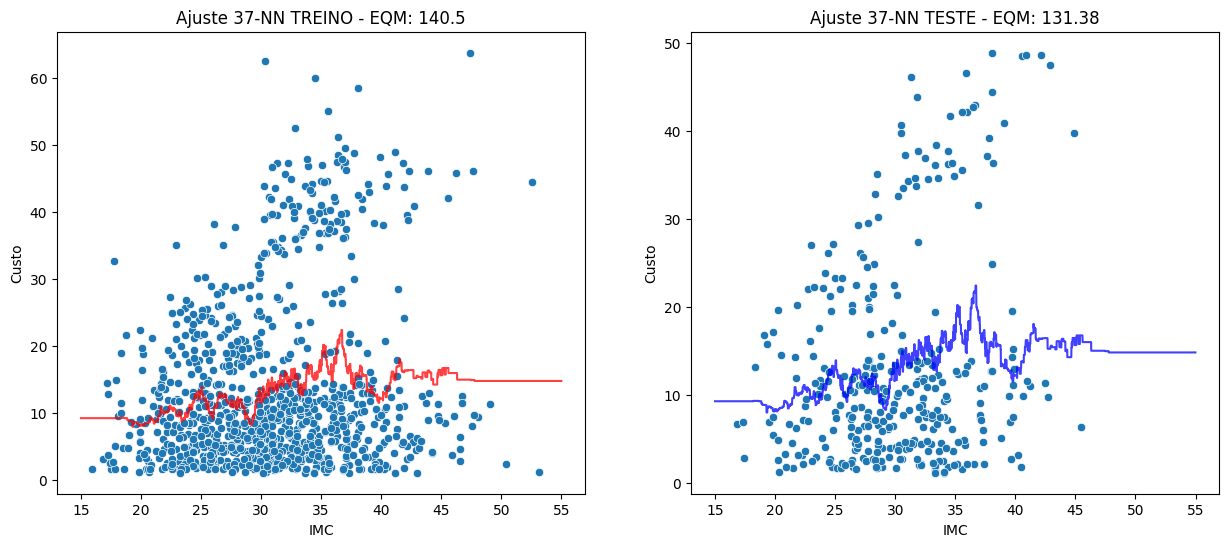

In [ ]:
# Grafico do KNN com 1 variável

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(Xtreino, ytreino)

preditos_treino = knn.predict(Xtreino)
preditos_teste = knn.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

x = np.arange(15, 55, 0.01)
y = knn.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()




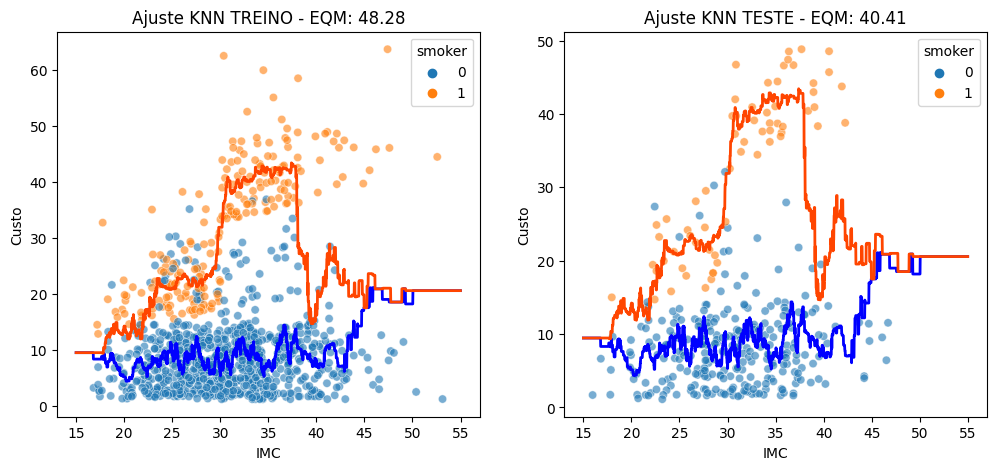

In [ ]:
# Gráfico do Modelo com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

k = 15

modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt. subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue = Xtreino ['smoker'], alpha = 0.6)
plt. plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue = Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()

In [ ]:
Xtreino.shape

(1003, 2)

## **Comparação dos Modelos**

In [ ]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25):

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)

        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino)
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)

    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}\n'.format(res_teste))

    return res_treino, res_teste

In [ ]:
HoldoutRepetido(modelo = KNeighborsRegressor())

EQM médio de TREINO: 31.45
EQM médio de TESTE: 46.86



(31.45, 46.86)

In [ ]:
HoldoutRepetido(KNeighborsRegressor(n_neighbors = 20))

EQM médio de TREINO: 48.9
EQM médio de TESTE: 54.6



(48.9, 54.6)

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(),
           KNeighborsRegressor(n_neighbors = 5),
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45)]

nomes = ['Regressão Linear',
         'KNN - K = 5',
         'KNN - K = 15',
         'KNN - K = 25',
         'KNN - K = 35',
         'KNN - K = 45']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 50.47
EQM médio de TESTE: 49.28

EQM médio de TREINO: 31.52
EQM médio de TESTE: 46.38

EQM médio de TREINO: 44.01
EQM médio de TESTE: 50.52

EQM médio de TREINO: 54.32
EQM médio de TESTE: 58.95

EQM médio de TREINO: 67.49
EQM médio de TESTE: 71.86

EQM médio de TREINO: 80.46
EQM médio de TESTE: 85.51



,EQM Treino,EQM Teste
KNN - K = 5,31.52,46.38
Regressão Linear,50.47,49.28
KNN - K = 15,44.01,50.52
KNN - K = 25,54.32,58.95
KNN - K = 35,67.49,71.86
KNN - K = 45,80.46,85.51
